In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline


class ClusterNetwork:


    def __init__(self) -> None:
        self.cluster_data = None
        self.scaled_cluster_data = None
        self.scaled_cluster_df = None
        self.scaler = None
        self.kmeans = None
        self.labels = None
        pass
    
    # old tradition, set_get methods for work data
    
    '''
    ToDo: running kmean cycle
    '''
    
    
    def set_scaler_on_cluster_data(self) -> None:
        self.scaler = StandardScaler()
        self.scaler.fit(self.cluster_data)
        self.scaled_cluster_data = self.scaler.transform(self.cluster_data)
        self.scaled_cluster_df = pd.DataFrame(self.scaled_cluster_data)
        print(self.scaled_cluster_df)

    def create_and_train_cluster(self, n_cluster=20, random_state=42) -> None:
        self.kmeans = KMeans(n_clusters=n_cluster, random_state=random_state)
        self.kmeans.fit(self.scaled_cluster_df)
        self.labels = self.kmeans.predict(self.scaled_cluster_data)
        print(self.labels)
        pass
    

    def run_cluster_cycle(self) -> None:
        self.set_scaler_on_cluster_data()
        self.create_and_train_cluster()
        
    
    
    '''
    Helper functions to setup kmean, store and load models
    '''

    def load_kmean_model(self, model_name: str) -> KMeans:
        if os.path.isfile('../data/models/'+model_name+'.pickle'):
            with open('../data/models'+model_name+'.pickle', 'rb') as f:
                return pickle.load(file=f)
        else:
            print('could not found model or path')


    def save_kmean_model(self, model_object: KMeans, model_name: str) -> None:
        if os.path.isdir('../data/models/'):
            with open('../data/models'+model_name+'.pickle', 'wb') as f:
                pickle.dump(model_object, file=f)
        else:
            print('could not found path data/models')

In [2]:
# load data

data = pd.read_csv('../data/song_data.csv')
data.drop(columns='Unnamed: 0', inplace=True)

In [3]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,artist_name,artist_id
0,0.776,0.378,0,-8.035,1,0.0322,0.4350,0.001870,0.1100,0.453,...,audio_features,2EgfLUS0jNiujIWc3ZLEtn,spotify:track:2EgfLUS0jNiujIWc3ZLEtn,https://api.spotify.com/v1/tracks/2EgfLUS0jNiu...,https://api.spotify.com/v1/audio-analysis/2Egf...,175861,4,Tangerine,Tim Atlas,3CiuXDKttPUT0tWGHicFUH
1,0.663,0.697,0,-5.503,1,0.0508,0.2720,0.008860,0.1530,0.873,...,audio_features,2ngRZDAluwYoJeuqEA4dhK,spotify:track:2ngRZDAluwYoJeuqEA4dhK,https://api.spotify.com/v1/tracks/2ngRZDAluwYo...,https://api.spotify.com/v1/audio-analysis/2ngR...,198384,4,Sidestep,Tim Atlas,3CiuXDKttPUT0tWGHicFUH
2,0.596,0.675,9,-7.790,1,0.0517,0.1880,0.739000,0.1020,0.155,...,audio_features,3tcJ3yUXKtJpsgpAyVzP7R,spotify:track:3tcJ3yUXKtJpsgpAyVzP7R,https://api.spotify.com/v1/tracks/3tcJ3yUXKtJp...,https://api.spotify.com/v1/audio-analysis/3tcJ...,242163,4,Crime of Passion,Tim Atlas,3CiuXDKttPUT0tWGHicFUH
3,0.593,0.274,2,-15.402,1,0.2780,0.9340,0.000569,0.0758,0.346,...,audio_features,6W4osAjSVCvUwOlVFBP76n,spotify:track:6W4osAjSVCvUwOlVFBP76n,https://api.spotify.com/v1/tracks/6W4osAjSVCvU...,https://api.spotify.com/v1/audio-analysis/6W4o...,226683,4,Together Lonely,Tim Atlas,3CiuXDKttPUT0tWGHicFUH
4,0.871,0.281,9,-10.650,0,0.0466,0.7670,0.000180,0.1470,0.541,...,audio_features,1vdpFZ4rsQevl8WC6m3m9y,spotify:track:1vdpFZ4rsQevl8WC6m3m9y,https://api.spotify.com/v1/tracks/1vdpFZ4rsQev...,https://api.spotify.com/v1/audio-analysis/1vdp...,184259,4,Small Talk,Tim Atlas,3CiuXDKttPUT0tWGHicFUH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222308,0.906,0.724,6,-4.109,0,0.0931,0.4460,0.000000,0.0848,0.744,...,audio_features,4dUlJyHgdz6IeCJIYMHHDm,spotify:track:4dUlJyHgdz6IeCJIYMHHDm,https://api.spotify.com/v1/tracks/4dUlJyHgdz6I...,https://api.spotify.com/v1/audio-analysis/4dUl...,164769,4,Me Gusta - Remix (feat. Cardi B & 24kGoldn),Cardi B,4kYSro6naA4h99UJvo89HB
222309,0.934,0.443,1,-7.541,1,0.4100,0.0272,0.000000,0.0889,0.359,...,audio_features,051wt8AyLFgYnVuberd3vO,spotify:track:051wt8AyLFgYnVuberd3vO,https://api.spotify.com/v1/tracks/051wt8AyLFgY...,https://api.spotify.com/v1/audio-analysis/051w...,187541,4,WAP (feat. Megan Thee Stallion),Cardi B,4kYSro6naA4h99UJvo89HB
222310,0.903,0.447,6,-11.554,1,0.1160,0.0873,0.000000,0.1360,0.239,...,audio_features,3DyiAk1BzIF8rq9rimypG4,spotify:track:3DyiAk1BzIF8rq9rimypG4,https://api.spotify.com/v1/tracks/3DyiAk1BzIF8...,https://api.spotify.com/v1/audio-analysis/3Dyi...,374545,4,La Bebe - Remix,Cardi B,4kYSro6naA4h99UJvo89HB
222311,0.805,0.835,0,-4.603,1,0.0896,0.1300,0.000005,0.3650,0.722,...,audio_features,1EJgymgJHcjSOGSHcYaxvW,spotify:track:1EJgymgJHcjSOGSHcYaxvW,https://api.spotify.com/v1/tracks/1EJgymgJHcjS...,https://api.spotify.com/v1/audio-analysis/1EJg...,188230,4,South of the Border (feat. Camila Cabello & Ca...,Cardi B,4kYSro6naA4h99UJvo89HB


In [4]:
data_label = data['uri']
data_label

0         spotify:track:2EgfLUS0jNiujIWc3ZLEtn
1         spotify:track:2ngRZDAluwYoJeuqEA4dhK
2         spotify:track:3tcJ3yUXKtJpsgpAyVzP7R
3         spotify:track:6W4osAjSVCvUwOlVFBP76n
4         spotify:track:1vdpFZ4rsQevl8WC6m3m9y
                          ...                 
222308    spotify:track:4dUlJyHgdz6IeCJIYMHHDm
222309    spotify:track:051wt8AyLFgYnVuberd3vO
222310    spotify:track:3DyiAk1BzIF8rq9rimypG4
222311    spotify:track:1EJgymgJHcjSOGSHcYaxvW
222312    spotify:track:3vQhEd4lOg4mAV6CHCgoHW
Name: uri, Length: 222313, dtype: object

In [5]:
data_num = data._get_numeric_data()
data_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.776,0.378,0,-8.035,1,0.0322,0.4350,0.001870,0.1100,0.453,135.981,175861,4
1,0.663,0.697,0,-5.503,1,0.0508,0.2720,0.008860,0.1530,0.873,180.035,198384,4
2,0.596,0.675,9,-7.790,1,0.0517,0.1880,0.739000,0.1020,0.155,164.985,242163,4
3,0.593,0.274,2,-15.402,1,0.2780,0.9340,0.000569,0.0758,0.346,160.031,226683,4
4,0.871,0.281,9,-10.650,0,0.0466,0.7670,0.000180,0.1470,0.541,99.975,184259,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222308,0.906,0.724,6,-4.109,0,0.0931,0.4460,0.000000,0.0848,0.744,110.021,164769,4
222309,0.934,0.443,1,-7.541,1,0.4100,0.0272,0.000000,0.0889,0.359,133.026,187541,4
222310,0.903,0.447,6,-11.554,1,0.1160,0.0873,0.000000,0.1360,0.239,99.009,374545,4
222311,0.805,0.835,0,-4.603,1,0.0896,0.1300,0.000005,0.3650,0.722,125.027,188230,4


In [6]:
# instance lib
cluster = ClusterNetwork()

In [7]:
cluster.cluster_data = data_num

In [8]:
cluster.scaled_cluster_data

In [9]:
cluster.run_cluster_cycle()

              0         1         2         3         4         5         6   \
0       1.131928 -1.007203 -1.463506  0.158242  0.780918 -0.528509  0.479595   
1       0.502073  0.297238 -1.463506  0.661482  0.780918 -0.379554 -0.024319   
2       0.128619  0.207277  1.032434  0.206936  0.780918 -0.372347 -0.284004   
3       0.111897 -1.432475 -0.908852 -1.305963  0.780918  1.439935  2.022250   
4       1.661453 -1.403851  1.032434 -0.361494 -1.280545 -0.413189  1.505971   
...          ...       ...       ...       ...       ...       ...       ...   
222308  1.856540  0.407645  0.200454  0.938542 -1.280545 -0.040803  0.513601   
222309  2.012611 -0.741408 -1.186179  0.256426  0.780918  2.497032 -0.781117   
222310  1.839819 -0.725051  0.200454 -0.541166  0.780918  0.142588 -0.595318   
222311  1.293572  0.861542 -1.463506  0.840359  0.780918 -0.068832 -0.463311   
222312  1.204389  0.955592 -0.076872  0.883091  0.780918 -0.462841 -0.185077   

              7         8         9    

In [10]:
cluster.scaler.mean_

array([ 5.72924979e-01,  6.24310694e-01,  5.27719027e+00, -8.83117955e+00,
        6.21182747e-01,  9.81950367e-02,  2.79866393e-01,  2.00119117e-01,
        2.19634325e-01,  4.48919406e-01,  1.21531551e+02,  2.34937217e+05,
        3.91220486e+00])

In [17]:
# store scaler
filename = "../data/models/scaler.pickle"
with open(filename, "wb") as f:
    pickle.dump(cluster.scaler,f)

In [11]:
len(cluster.labels)

222313

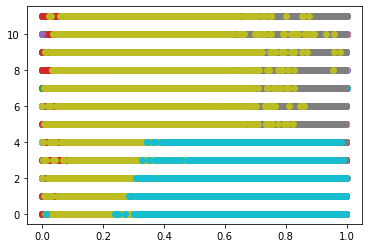

In [12]:
# assign a cluster to each example

labels = cluster.kmeans.predict(cluster.scaled_cluster_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for clust in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == clust)
    # create scatter of these samples
    pyplot.scatter(cluster.cluster_data.to_numpy()[row_ix, 1], cluster.cluster_data.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

  0%|          | 0/38 [00:00<?, ?it/s]

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

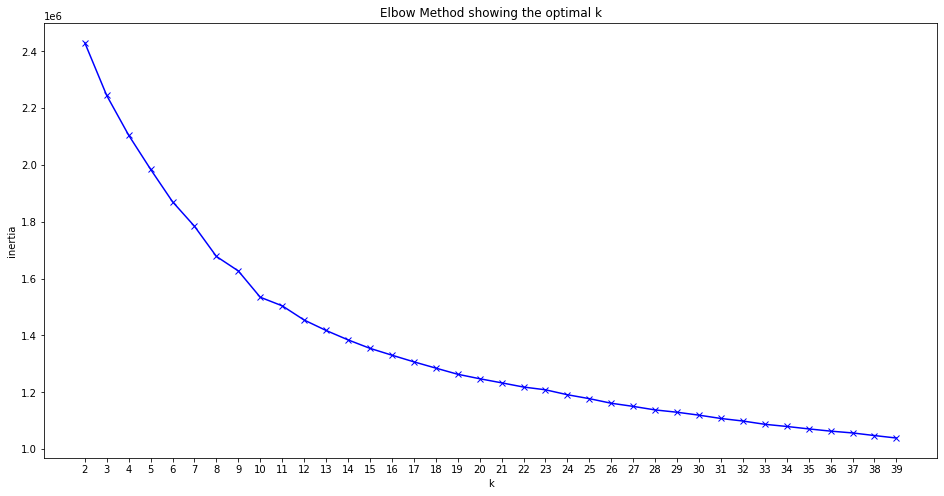

In [13]:
K = range(2, 40)
inertia = []

for k in tqdm(K):
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(cluster.scaled_cluster_df)
    inertia.append(kmeans.inertia_)

    filename = "../data/models/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#K = range(2, 40)
silhouette = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(cluster.scaled_cluster_df)
    
    filename = "../data/models/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(cluster.scaled_cluster_df, kmeans.predict(cluster.scaled_cluster_df)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')